In [1]:
import torch
import torchvision.transforms as transforms              
from torchvision.datasets import ImageFolder
import torchvision.models as models
from torchvision.models import VGG16_BN_Weights
from torch.utils.data import DataLoader
import numpy as np
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter,raps_imagenet_real_scatter, saps_imagenet_real_scatter

# load pre-trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.vgg16_bn(weights=VGG16_BN_Weights.IMAGENET1K_V1).to(device)

#  Reprocess
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=4)

model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)
model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.2

Before temperature - NLL: 1.208, ECE: 0.024
Optimal temperature: 1.020
After temperature - NLL: 1.207, ECE: 0.026


APS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8064 ± 0.0016
Final Average Prediction Set Size: 5.53 ± 0.08
Final Average Coverage: 0.8004 ± 0.0040
Final Average Real Probability: 0.6871 ± 0.0038


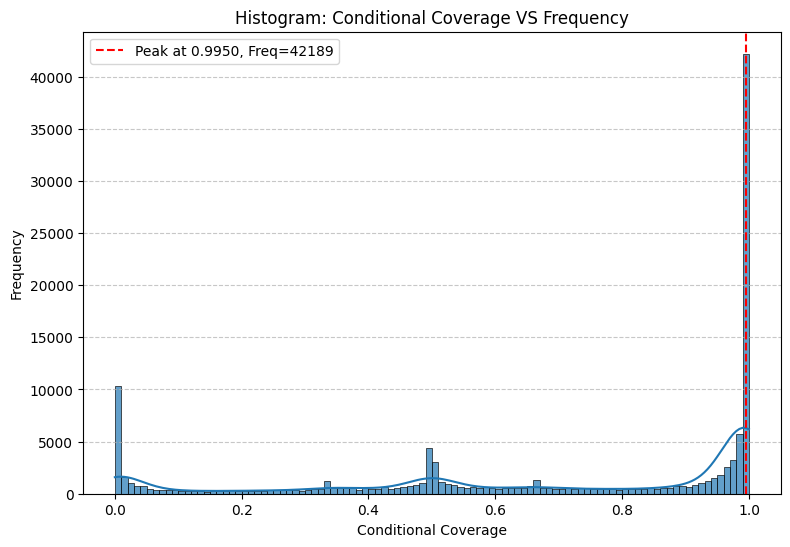

42189 (33.92%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8224 ± 0.0016
Final Average Prediction Set Size: 2.87 ± 0.01
Final Average Coverage: 0.7995 ± 0.0037
Final Average Real Probability: 0.6679 ± 0.0035


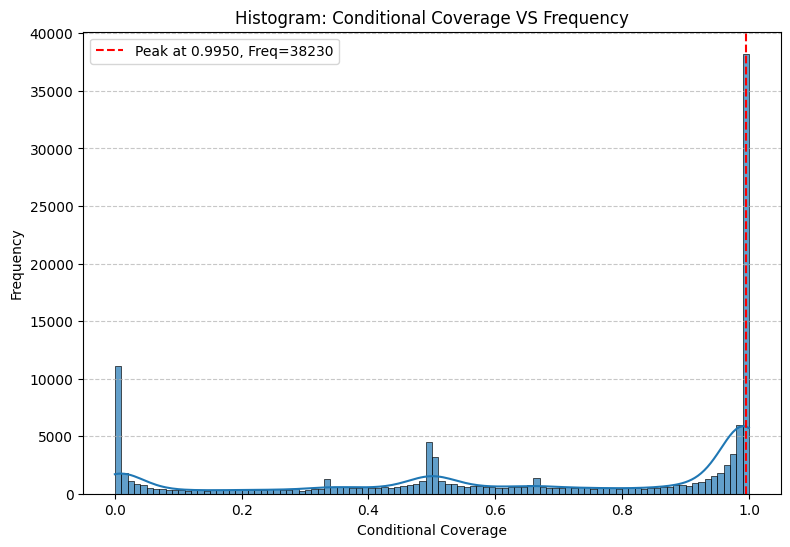

38230 (30.74%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.03, k_reg=7, num_runs=10, alpha=0.2, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8070 ± 0.0027
Final Average Prediction Set Size: 2.44 ± 0.02
Final Average Coverage: 0.7997 ± 0.0036
Final Average Real Probability: 0.6838 ± 0.0022


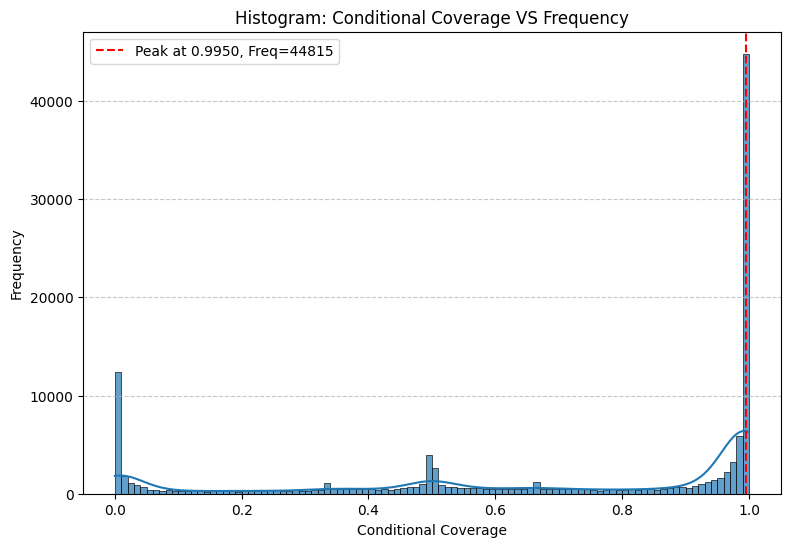

44815 (36.04%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.1, num_runs=10, alpha=0.2, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8107 ± 0.0013
Final Average Prediction Set Size: 5.34 ± 0.07
Final Average Coverage: 0.8004 ± 0.0034
Final Average Real Probability: 0.6830 ± 0.0040


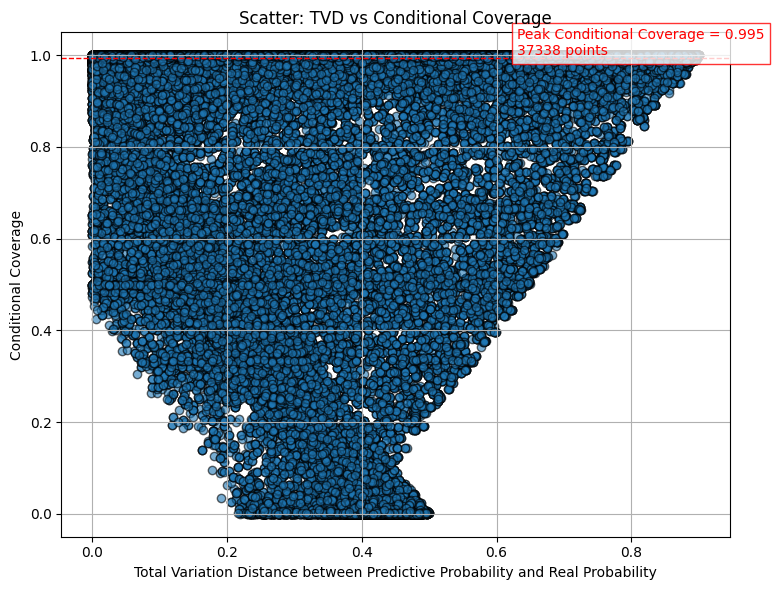

Peak Conditional Coverage = 0.995, with 37338 samples

=== Count Regions Summary ===
37295 (30.0%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
24747 (19.9%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
55527 (44.6%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.95145']
  Real Probability Set      : ['0.99823']
Sample 2:
  Predictive Probability Set: ['0.80707']
  Real Probability Set      : ['0.99759']
Sample 3:
  Predictive Probability Set: ['0.99685']
  Real Probability Set      : ['0.99456']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.70613']
  Real Probability Set      : ['0.00571']
Sample 2:
  Predictive Probability Set: ['0.78662', '0.13783']
  Real Probability Set      : ['0.03361', '0.02326']
Sample 3:
  Predictive Probability Set: ['0.65722', '0.15710']
  Real Probability Set      : ['0.00068', '0.00443

In [2]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8261 ± 0.0018
Final Average Prediction Set Size: 2.84 ± 0.01
Final Average Coverage: 0.8000 ± 0.0036
Final Average Real Probability: 0.6652 ± 0.0036


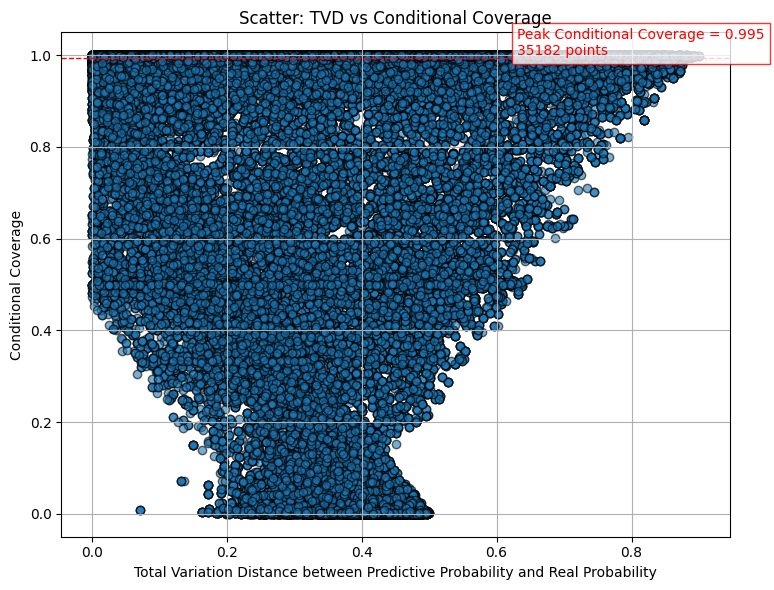

Peak Conditional Coverage = 0.995, with 35182 samples

=== Count Regions Summary ===
38926 (31.3%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
21708 (17.5%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
59010 (47.5%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.95514']
  Real Probability Set      : ['0.96345']
Sample 2:
  Predictive Probability Set: ['0.99072']
  Real Probability Set      : ['0.99574']
Sample 3:
  Predictive Probability Set: ['0.87937']
  Real Probability Set      : ['0.97241']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.41898', '0.32197']
  Real Probability Set      : ['0.00653', '0.14371']
Sample 2:
  Predictive Probability Set: ['0.55578', '0.14702', '0.04868', '0.03178', '0.02903']
  Real Probability Set      : ['0.00045', '0.00045', '0.00045', '0.00000', '0.00045']
Sample 3:
  Predictive Pr

In [3]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.03, k_reg=7, num_runs=10, alpha=0.2)

SAPS Classification on CIFAR10-H(alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8104 ± 0.0030
Final Average Prediction Set Size: 2.43 ± 0.02
Final Average Coverage: 0.7996 ± 0.0040
Final Average Real Probability: 0.6815 ± 0.0029


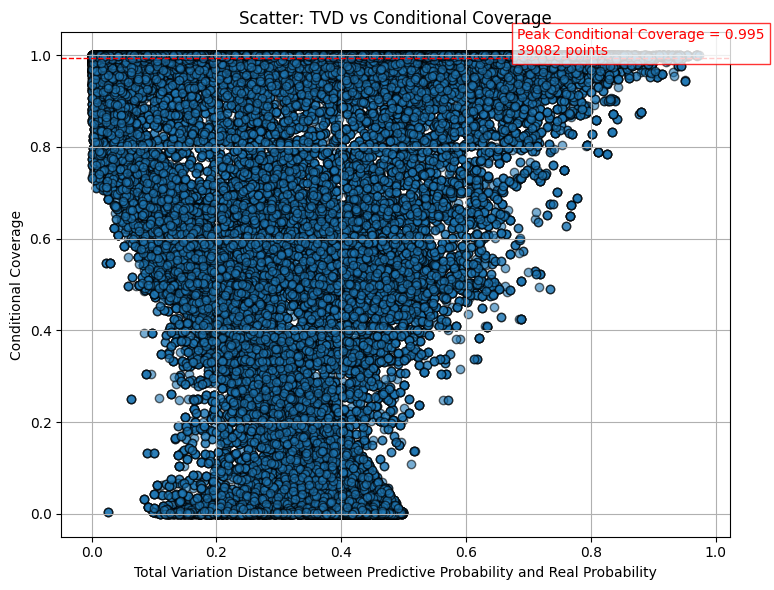

Peak Conditional Coverage = 0.995, with 39082 samples

=== Count Regions Summary ===
41438 (33.3%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
21691 (17.4%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
53961 (43.4%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.99804']
  Real Probability Set      : ['0.99764']
Sample 2:
  Predictive Probability Set: ['0.55064', '0.42411', '0.00673']
  Real Probability Set      : ['0.49891', '0.46059', '0.04050']
Sample 3:
  Predictive Probability Set: ['0.93396']
  Real Probability Set      : ['0.99488']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.43548', '0.12999', '0.10858', '0.08677', '0.06556']
  Real Probability Set      : ['0.00031', '0.00030', '0.00030', '0.14916', '0.00219']
Sample 2:
  Predictive Probability Set: ['0.55578', '0.14702', '0.04868', '0.03178']
  Real Proba

In [4]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.1, num_runs=10, alpha=0.2)